In [1]:
from keras import layers, models
from utils import Data_func
from utils import plot_history
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
class ANN_models_class(models.Model):

    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

In [3]:
Nin = 784
Nh = 100
number_of_class = 10
Nout = number_of_class
model = ANN_seq_class(Nin, Nh, Nout)
(X_train, Y_train), (X_test, Y_test) = Data_func()


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 50us/step - loss: 0.4094 - acc: 0.8885 - val_loss: 0.2363 - val_acc: 0.9329
Epoch 2/10
42000/42000 [==============================] - 2s 44us/step - loss: 0.1922 - acc: 0.9442 - val_loss: 0.1749 - val_acc: 0.9503
Epoch 3/10
42000/42000 [==============================] - 2s 41us/step - loss: 0.1400 - acc: 0.9601 - val_loss: 0.1509 - val_acc: 0.9558
Epoch 4/10
42000/42000 [==============================] - 2s 39us/step - loss: 0.1106 - acc: 0.9681 - val_loss: 0.1364 - val_acc: 0.9615
Epoch 5/10
42000/42000 [==============================] - 2s 38us/step - loss: 0.0892 - acc: 0.9733 - val_loss: 0.1155 - val_acc: 0.9665
Epoch 6/10
42000/42000 [==============================] - 2s 36us/step - loss: 0.0734 - acc: 0.9785 - val_loss: 0.1119 - val_acc: 0.9688
Epoch 7/10
42000/42000 [==============================] - 2s 38us/step - loss: 0.0616 - acc: 0.9821 - val_loss: 0.1083 - val_acc

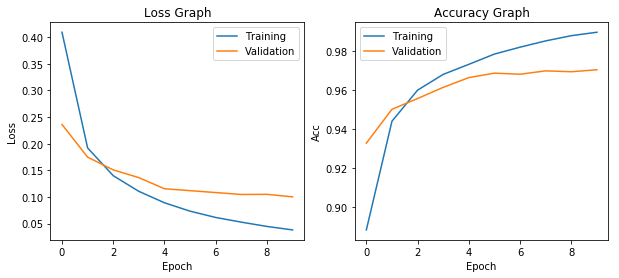

In [4]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.3)
performace_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performace_test)
plot_history(history)